# Anonymization: Balancing the use of data in aggregate with protecting people’s privacy

## Pseudonymization: The removal of direct identifiers
1. We want a deterministic function (same inputs are always mapped to same
outputs).
2. We want the possible outputs to all have the same length (for simplicity)
3. We want collisions to be very unlikely (impossible is too much to ask).
4. We want a function that is fast to compute (i.e. for any input it’s easy to
compute its output, for simplicity).
5. We want a function that is computationally infeasible to invert (i.e. for anyoutput it’s hard to compute its input). A one-way function.

These are what a “cryptographic hash function” does (when we say “hash
function” in this class we mean cryptographic hash function).

### hash function
h(k) = ⎣m (k a –⎣k a⎦)⎦
with k the input and a and m constant.

https://docs.python.org/3/library/hashlib.html

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from hashlib import blake2b
from hashlib import md5


In [92]:
# blake2b is a fast hash function with the possibility to add salt directly inside de call of the function
h = blake2b()
h.update(b'Hello world')
h.hexdigest()

'6ff843ba685842aa82031d3f53c48b66326df7639a63d128974c5c14f31a0f33343a8c65551134ed1ae0f2b0dd2bb495dc81039e3eeb0aa1bb0388bbeac29183'

In [93]:
# Fonctione présenté dans les slides du cours
def create_lookup_table(N):
    table = {}
    for id in range(10**N):
        h = md5(str(id).encode()).hexdigest()
        table[h] = id
    return table

In [94]:
create_lookup_table(1)

{'cfcd208495d565ef66e7dff9f98764da': 0,
 'c4ca4238a0b923820dcc509a6f75849b': 1,
 'c81e728d9d4c2f636f067f89cc14862c': 2,
 'eccbc87e4b5ce2fe28308fd9f2a7baf3': 3,
 'a87ff679a2f3e71d9181a67b7542122c': 4,
 'e4da3b7fbbce2345d7772b0674a318d5': 5,
 '1679091c5a880faf6fb5e6087eb1b2dc': 6,
 '8f14e45fceea167a5a36dedd4bea2543': 7,
 'c9f0f895fb98ab9159f51fd0297e236d': 8,
 '45c48cce2e2d7fbdea1afc51c7c6ad26': 9}

In [95]:
data = pd.read_csv("dataset.csv")
ids = data.head(10)["id"]

In [96]:
# J'ai essayé la fonction sur notre data set, ça a l'air pas mal ! 
h = blake2b(digest_size=32, salt=b'LINMA2472')
table = {}
for id in ids:
    id_byte = bytes(id, encoding='utf8')
    h.update(id_byte)
    table[id] = h.hexdigest()
table

{'Amelia Morrow': 'd2847521058786f0977d871e1d28dd3e19f26295bbcced0ba4eafb64e5940c42',
 'Lillian Cole': '3cf0d9de236313f2e3136ba18e046ada469a986f6828b5e46888289d289e30a8',
 'Lillian Simpson': '365218d17c0b0b4dc25d11c663cd1fdcbed5d080189682fda24006737d4fc3f5',
 'Avery Richards': '480bb709ee3709a1c42eb0d9de89f626594d72265e101bf326a03072c3f47e7c',
 'Sophia Alvarado': '261cd6318baf3f76475f207219a18059a32696e991600135308ea97cc99c1a91',
 'Maxwell Brock': 'd0cc541cc86a0b1487bc3dfee87e6bbaa8e4fc400c7bfa33227ea18c0fe3321a',
 'Taylor Harris': 'fd9b0997993b227858b8f04160891ec7e6d6b48e3df3bca463adb9f3bbfe37ed',
 'Declan Gomez': 'd8d5de53a2c20fd26235024469b57060ae2d160d3f9f5b5fe5584f1916c1dd43',
 'Connor Lynch': '305120f0526abbd042b5d184e0acbb53170aaafe140785183834b07bf7b79cb5',
 'Aurora Cole': '96ad4b0348f7d1346a61040a61b755329926e4ab580e186f061e2bd4f4885c21'}

### Fonctions de modif du data set pour le case 1 :
"Study the impact of stree and high-pressure invironments on one's health'

In [97]:
def hash_ids(ids, salt=b'azerty', digest_size=32):
    """
    Function that return a list of 'hashed' ids
    Input : ids = list of string to hash
    salt=b'azerty' by default, max length=16 bytes
    digest_size=32 by default, max size = 64
    """
    h = blake2b(digest_size=digest_size, salt=salt)
    ids_hashed = []
    for id in ids:
        id_byte = bytes(id, encoding='utf8')
        h.update(id_byte)
        ids_hashed.append(h.hexdigest())
    return ids_hashed

In [98]:
def dob_to_yob(dobs):
    """
    Function that convert the date of birth to just a year of birth
    """
    yobs = []
    for dob in dobs:
        dob_list = list(dob)
        yob = str(dob_list[-4]+dob_list[-3]+dob_list[-2]+dob_list[-1])
        yobs.append(yob)
    return yobs

In [99]:
def zip_to_state(zips):
    """
    Convert a list of zipcode to a list of states
    """
    states = [np.nan]*len(zips)
    zip_code = pd.read_csv("zip_code_database.csv")
    interest = zip_code[['zip', 'state']]
    index = 0
    for zipcode in zips:
        counter = 0
        for zip_state in interest.iloc[:,0]:
            if zipcode == zip_state:
                states[index] = (interest.iloc[counter, 1])
            counter += 1
        index += 1
    return states

### Cleanage du data set

In [327]:
stress_impact = pd.read_csv("dataset.csv")

# Chunk to delete undesired row after clustering test
rows_to_delete = [1105, 1643, 465, 1881, 1182, 1753, 1147, 1286, 372, 922, 441, 1087, 3, 1827]
index_to_delete = []
for row in rows_to_delete:
    index_to_delete.append(row-1)
stress_impact = stress_impact.drop(stress_impact.index [rows_to_delete])

# Chunk that use the function 'has_ids' to return an hashed id's list
ids = stress_impact["id"]
hashed_ids = hash_ids(ids)
stress_impact["id"] = hashed_ids

# Chunk that transforms date of birth in decade of birth
stress_impact['partial_dob'] = stress_impact['dob'].astype(str).str[:-1]
stress_impact['decade of birth'] = stress_impact['partial_dob'].astype(str).str[-3:]
stress_impact['decade of birth'] =stress_impact['decade of birth'].astype(str) +'0 s'
stress_impact.drop(['dob'], axis='columns', inplace=True)

# Chunk that delete the useless rows
stress_impact.drop(['ancestry'], axis='columns', inplace=True)
stress_impact.drop(['number_vehicles'], axis='columns', inplace=True)
stress_impact.drop(['education'], axis='columns', inplace=True)
stress_impact.drop(['zipcode'], axis='columns', inplace=True)
stress_impact.drop(['partial_dob'], axis='columns', inplace=True)
stress_impact.drop(['gender'], axis='columns', inplace=True)
print(stress_impact.shape)
# Chunk that group the number of children in interval
replace_child = ['0', '1-2','1-2', '3-4-5', '3-4-5', '3-4-5', '7-8-9', '7-8-9', '7-8-9']
new_child = ['']*len(stress_impact)
children = stress_impact['children']
count = 0
for child in children.iloc[:]:
    new_child[count] = replace_child[child]
    count += 1
stress_impact['children'] = new_child

# Chunk that group the commute time in interval
ref_commute = ['0', '0-1.00', '1.00<', '1.00<', '1.00<']
new_commute = ['']*len(stress_impact)
commutes = stress_impact['commute_time']
count = 0
for commu in commutes.iloc[:]:
    new_commute[count] = ref_commute[math.ceil(commu)]
    count += 1 
stress_impact['commute_time'] = new_commute

# Chunk that delete unique rows
stress_impact = stress_impact[stress_impact.duplicated(['employment', 'children','marital_status', 'commute_time', 'accommodation', 'decade of birth'],keep=False) ]

# Le data set est clean
stress_impact.to_csv('stress_impact_health.csv', index = True) 

(1986, 8)


In [320]:
# Chunk that give the undesired rows
clusters = stress_impact.groupby(['employment', 'children','marital_status', 'commute_time', 'accommodation', 'decade of birth']).disease.apply(list)
i=0
diversity=[]
while i<274:
    diversity.append(len(set(clusters[i])))
    i=1+i
non_diverse_clusters = [i for i, e in enumerate(diversity) if e == 1]
non_diverse_clusters

[]

In [281]:
clusters[178:179]

employment  children  marital_status  commute_time  accommodation  decade of birth
Retired     1-2       married         0             Rent room      1940 s             [endometriosis, endometriosis]
Name: disease, dtype: object

In [308]:
# On supprime manuellement les lignes présents dans ces clusters
to_delete = stress_impact.loc[(stress_impact['employment'] == 'Retired') & 
                  (stress_impact['children'] == '1-2') &
                  (stress_impact['marital_status']== 'married') &
                  (stress_impact['commute_time']== '0') &
                  (stress_impact['accommodation']== 'Rent room') &
                  (stress_impact['decade of birth']== '1940 s')]
to_delete['id']

3       d69531784d3a60fed7c33acd8019b0055038e4e0315a8c...
1827    4feaa1cb24e8861a6c03b40eafad045706949308a505d4...
Name: id, dtype: object

In [ ]:
def bad_clusters_killer(dataset, columns_of_interest):
    clusters = dataset.groupby(columns_of_interest).disease.apply(list)
    
    i=0
    diversity=[]
    while i<len(clusters):
        diversity.append(len(set(clusters[i])))
        i=1+i
    
    non_diverse_clusters = [i for i, e in enumerate(diversity) if e == 1]
    
    for non_div in non_diverse_clusters

### Tests en tout genre

In [185]:
employ = stress_impact['employment']
employ.unique()

array(['Retired', 'Employed', 'Unemployed', 'Student'], dtype=object)

In [186]:
child = stress_impact['children']
child.unique()

array([2, 1, 4, 0, 3, 5, 6, 7, 8], dtype=int64)

In [187]:
marital_status = stress_impact['marital_status']
marital_status.unique()

array(['married', 'divorced', 'widowed', 'single'], dtype=object)

In [188]:
commute_time = stress_impact['commute_time']
commute_time.unique()

array([0.  , 0.1 , 2.1 , 0.43, 1.43, 0.77, 3.43, 1.77, 1.1 , 3.1 , 2.43,
       2.77])

In [189]:
accommodation = stress_impact['accommodation']
accommodation.unique()

array(['Own house', 'Rent flat', 'Rent room', 'Own flat', 'Rent house'],
      dtype=object)

<BarContainer object of 6 artists>

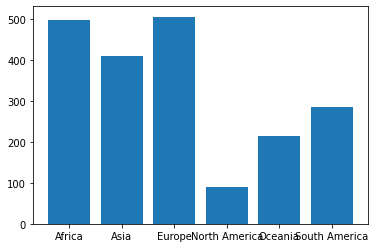

In [190]:
stress_impact = pd.read_csv("dataset.csv")

ancesters = stress_impact['ancestry']
africa = 0
asia = 0
europe = 0
north_america = 0
oceania = 0
south_america = 0
for ances in ancesters:
    if ances == 'Africa':
        africa += 1
    elif ances == 'North America':
        north_america += 1
    elif ances == 'Asia':
        asia += 1
    elif ances == 'Europe':
        europe += 1
    elif ances == 'Oceania':
        oceania += 1
    elif ances == 'South America':
        south_america += 1
        
origins = [africa, asia, europe, north_america, oceania, south_america]
plt.bar(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'], origins)

In [232]:
duplicateRows = stress_impact[stress_impact.duplicated(['employment', 'children','marital_status', 'commute_time', 'accommodation', 'year_of_birth'],keep=False) ]
len(duplicateRows)

1767

In [258]:
clusters = stress_impact.groupby(['employment', 'children','marital_status', 'commute_time', 'accommodation', 'year_of_birth']).disease.apply(list)
clusters

employment  children  marital_status  commute_time  accommodation  year_of_birth
Employed    0         married         1.00<         Own flat       1990 s           [Alzheimer's disease, skin cancer, endometriosis]
                      single          0-1.00        Own flat       1960 s              [Alzheimer's disease, hypertension, gastritis]
                                                                   1980 s                               [heart disease, hypertension]
                                                                   1990 s                [hypertension, heart disease, heart disease]
                                                    Own house      1960 s                               [heart disease, hypertension]
                                                                                                          ...                        
Unemployed  1-2       widowed         0             Own flat       1970 s                              [endometrios

In [ ]:
stress_impact.loc[(stress_impact['gender'] == 'female') & (stress_impact['state'] == 'NE') & (stress_impact['decade of birth']== '1950 s')]